# İÇİNDEKİLER
Titanic veri seti için makine öğrenmesi dersinde öğrendiklerimi uyguluyorum.


<font color = "blue" >
    
Content:

1.[Veri Setini Yüklemek](#1)
    
2.[Veriyi İncelemek](#2)
   
3.[Tek Değişkenli Veri Analizi](#3)
   * [Kategorik Veri Analizi](#4)
   * [Numerik Veri Analizi ](#5) 
    
4.[Temel Veri Analizi](#6)
    
5.[Outlier Detection](#7)
   
6. [Missing Value](#8)
    * [Find Missing Value](#9)
    *  [Fill Missing Value](#10)    
1.  [ Görselleştirme](#11)
    *  [Korelasyon Matrisi ("SibSp -- Parch -- Age -- Fare -- Survived"  Değerleri Arasındaki Korelasyon)](#12)   
    *  ["SibSp -- Survived" Arasındaki Korelasyon](#13)
    *  ["Parch -- Survived" Arasındaki Korelasyon](#14)   
    *  ["Pclass -- Survived" Arasındaki Korelasyon](#15)    
   *  ["Age --Survived" Arasındaki Korelasyon](#16) 
   *  [ "Pclass -- Survived -- Age" Arasındaki Korelasyon](#17)   
  *   ["Embarked -- Sex -- Pclass --Survived" Arasındaki Korelasyon](#18) 
  *   ["Embarked -- Sex -- Fare -- Survived" Arasındaki Korelasyon](#19)  
 *   [Fill Missing: Age Feature](#20)
1. [Feature Engineering](#21)
  *  [Name --Title](#22)  
  * [Family Size](#23) 
  * [Embarked](#24) 
  * [Ticket](#25)  
  * [Pclass](#26)  
  * [Sex](#27)   
  * [Drop Passenger ID and Cabin](#28)  
1. [Model Oluşturma](#29)
   * [Train -Test Split](#30)     
   *  [Simple Logistic Regression](#31)  
   *  [Hyperparameter Tuning -- Grid Search -- Cross Validation](#32)
   *  [Ensemble Modeling](#33)
   *  [ Prediction and Submission](#34)  

In [95]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


<a  id = "1"></a>
# Veri Setini Yüklemek

In [96]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
test_PassengerId = test_df["PassengerId"]

In [97]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [98]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a  id = "2"></a>
# Veriyi İncelemek
1. PassengerId
2. Survived 
3. Pclass
4. Name
5. Sex
6. Age
7. SibSp
8. Parch
9. Ticket
10. Fare
11. Cabin
12. Embarked

In [100]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<a  id = "3"></a>
# [Tek Değişkenli Veri Analizi](#3)
   * [Kategorik Veri Analizi](#4)
   * [Numerik Veri Analizi ](#5)

<a  id = "4"></a>
#  Kategorik Veri Analizi

In [101]:
def bar_plot(variable):
    #get future
    var = train_df[variable]
    #count number of categorical variable
    varValue = var.value_counts()
    #visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

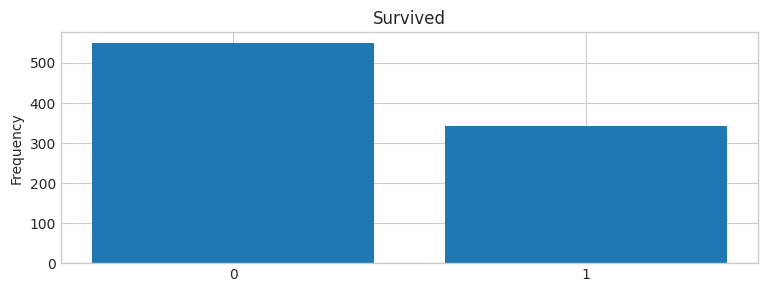

Survived: 
 Survived
0    549
1    342
Name: count, dtype: int64


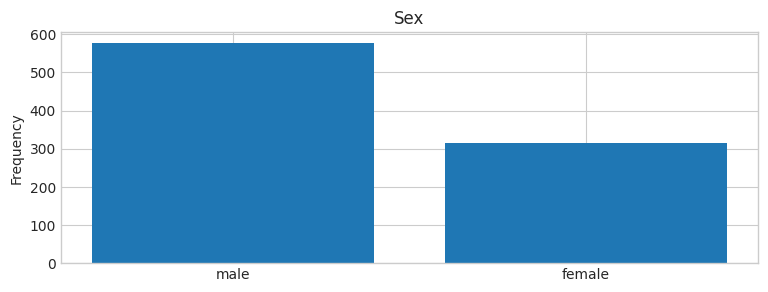

Sex: 
 Sex
male      577
female    314
Name: count, dtype: int64


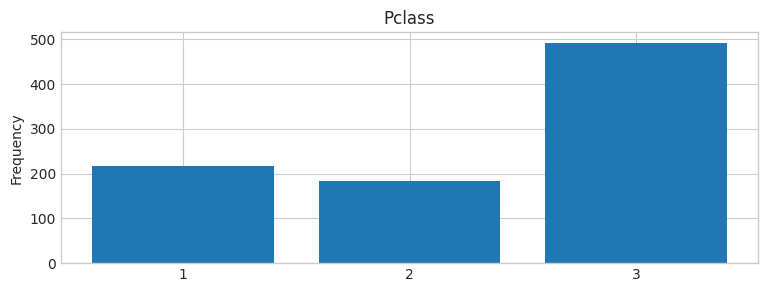

Pclass: 
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


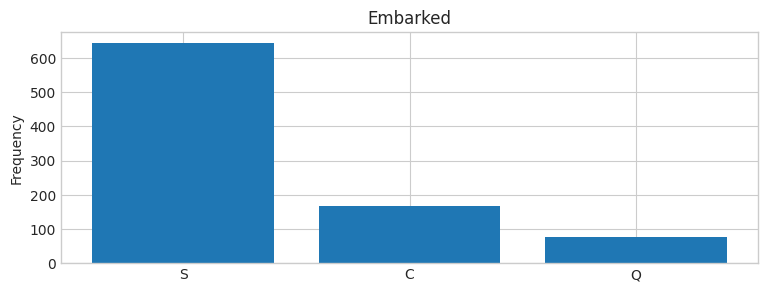

Embarked: 
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


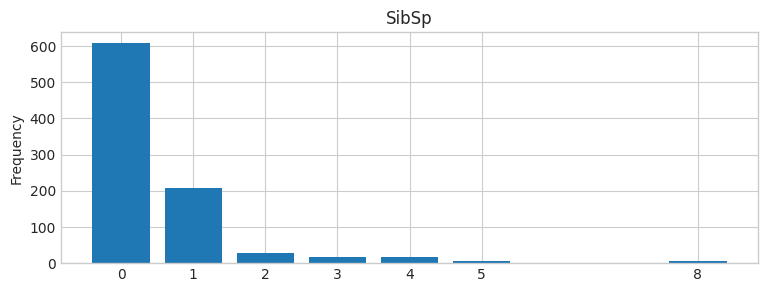

SibSp: 
 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


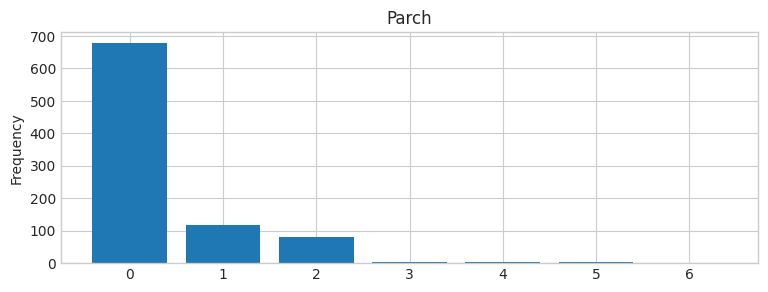

Parch: 
 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [102]:
category1 = ["Survived","Sex","Pclass","Embarked","SibSp","Parch"]
for c in category1:
    bar_plot(c)

In [103]:
category2 = ["Cabin","Name","Ticket"]
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64 

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64 

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64 



<a  id = "5"></a>
# Nümerik Veri Analizi

In [104]:
 def plot_histogram(variable):
        plt.figure(figsize = (9,3))
        plt.hist(train_df[variable])
        plt.xlabel(variable)
        plt.ylabel("frequency")
        plt.title("{} distribution with hist".format(variable))
        plt.show()

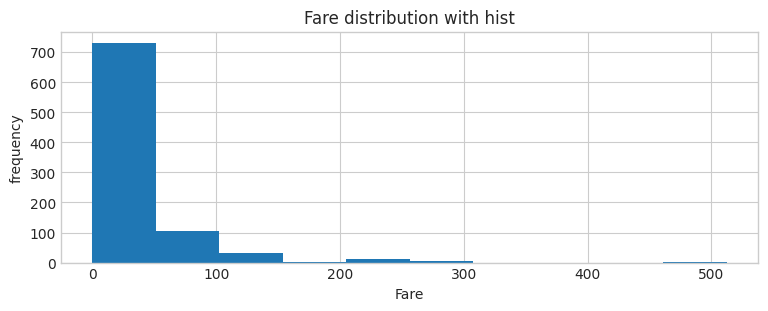

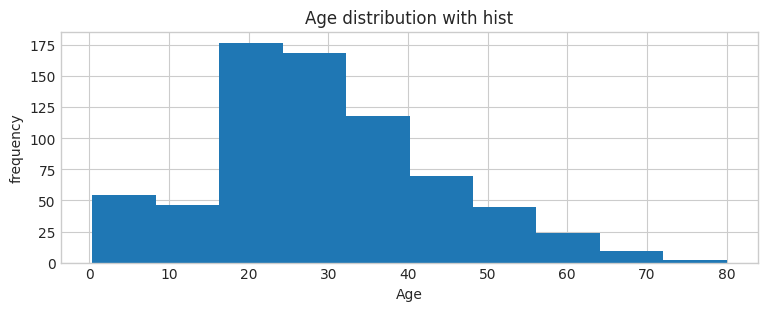

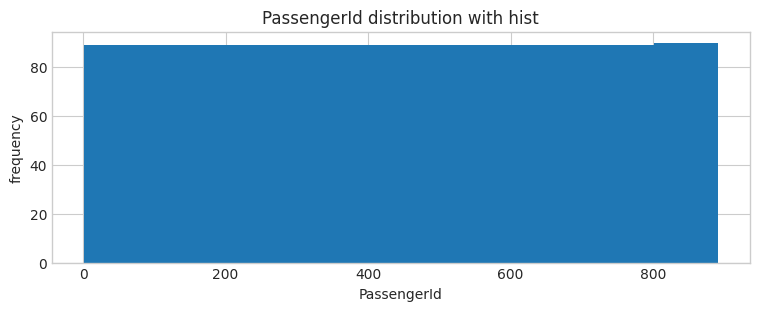

In [105]:
numericVar = ["Fare","Age","PassengerId"]
for n in numericVar:
    plot_histogram(n)

<a  id = "6"></a>
# Temel Veri Analizi

In [106]:
train_df[["Pclass","Survived"]]

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [107]:
train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [108]:
train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index = False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [109]:
train_df[["Sex","Survived"]].groupby(["Sex"],as_index = False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [110]:
train_df[["SibSp","Survived"]].groupby(["SibSp"],as_index = False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [111]:
train_df[["Parch","Survived"]].groupby(["Parch"],as_index = False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<a  id = "7"></a>
# Outlier Detection

In [112]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        Q1 = np.percentile(df[c],25)
        Q3 = np.percentile(df[c],75)
        IQR = Q3 - Q1
        outlier_step = IQR *1.5
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    return multiple_outliers
    
        

In [113]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [114]:
train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

<a  id = "8"></a>
#  Missing Value
    * Find Missing Value
    *  Fill Missing Value

In [115]:
train_df_len =len(train_df)
train_df = pd.concat([train_df,test_df],axis=0).reset_index(drop=True)

In [116]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a  id = "9"></a>
# Find Missing Value

In [117]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [118]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

In [119]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


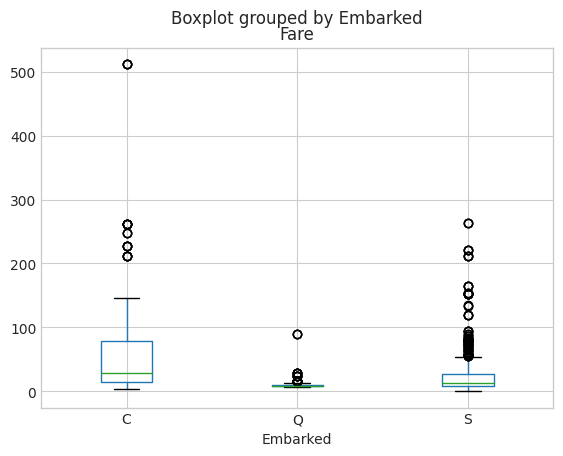

In [120]:
train_df.boxplot(column="Fare",by="Embarked")
plt.show()

In [121]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [122]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [123]:
train_df["Fare"]=train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] ==3]["Fare"]))

In [124]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a  id = "11"></a>
## Veri Görselleştirme 

<a  id = "12"></a>
# **Korelasyon Matrisi ("SibSp -- Parch -- Age -- Fare -- Survived"  Değerleri Arasındaki Korelasyon)**

<Axes: >

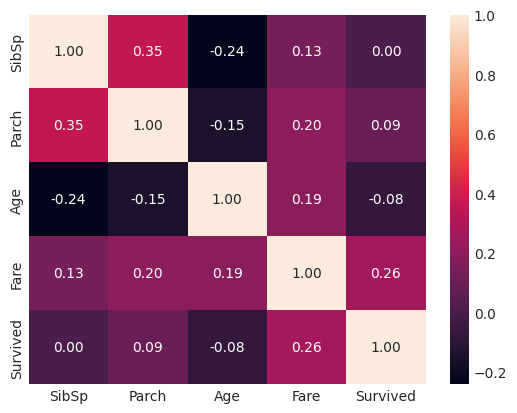

In [125]:
list1 = ["SibSp","Parch","Age","Fare","Survived"]
sns.heatmap(train_df[list1].corr(),annot = True,fmt = ".2f")

<a  id = "13"></a>
# "SibSp -- Survived" Arasındaki Korelasyon

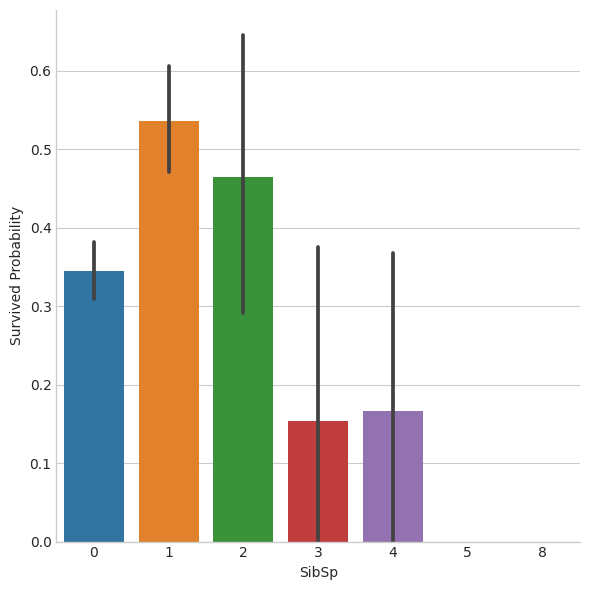

In [126]:
g = sns.catplot(x = "SibSp",y="Survived",data=train_df,kind = "bar", height = 6 )
g.set_ylabels("Survived Probability")
plt.show()

* Having a lot of SibSp have less chance to survive
* İf SibSp == 0 or 1 or 2, passenger has more chance to survive
* We can consider a new feature describing these categories

   
   <a  id = "14"></a>
# "Parch -- Survived" Arasındaki Korelasyon      
    

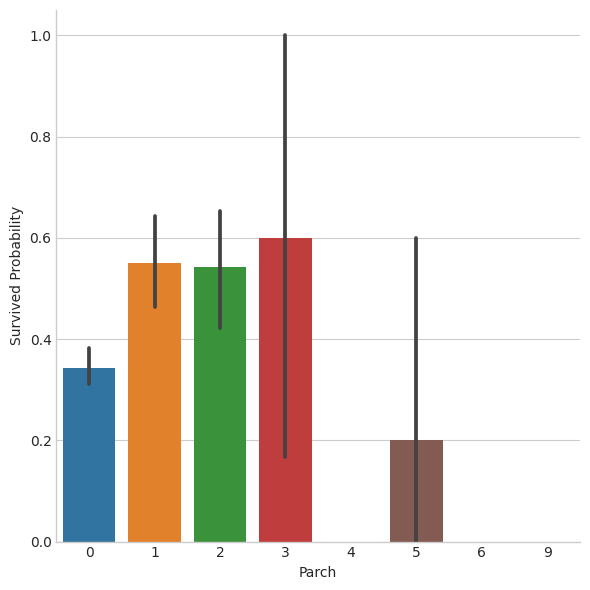

In [127]:
g = sns.catplot(x="Parch",y="Survived",kind="bar",data = train_df,height=6)
g.set_ylabels("Survived Probability")
plt.show()

* SibSp and parch can be used for new feature extraction with th=3
* small familes have more chance to survive
* there is a std in survival of passenger with parch=3

<a  id = "15"></a>
# "Pclass -- Survived" Arasındaki Korelasyon

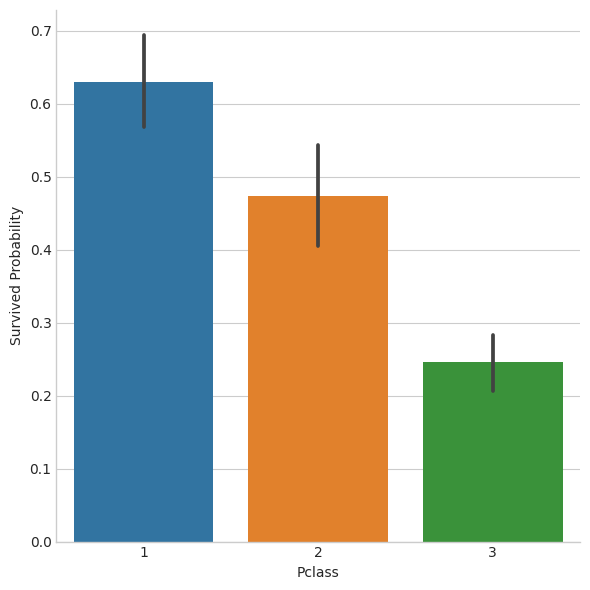

In [128]:
g = sns.catplot(x = "Pclass", y="Survived",data=train_df,kind="bar",height = 6)
g.set_ylabels("Survived Probability")
plt.show()

<a  id = "16"></a>
#  "Age -- Survived" Arasındaki Korelasyon

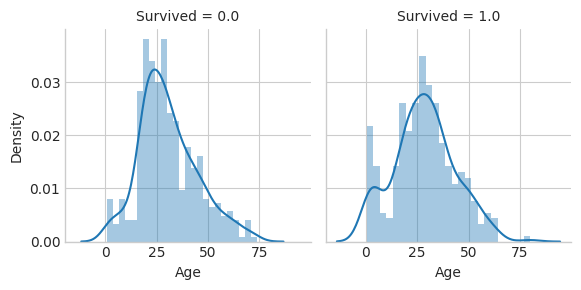

In [129]:
g = sns.FacetGrid(train_df,col= "Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

* age <= 10 has a high survival rate,
* oldest passengers (80) survived,
* large number of 20 years old did not survive,
* most passengers are in 15-35 age range,
* use age feature in training
* use age distribution for missing value of age

<a  id = "17"></a>
# "Pclass -- Survived -- Age" Arasındaki Korelasyon

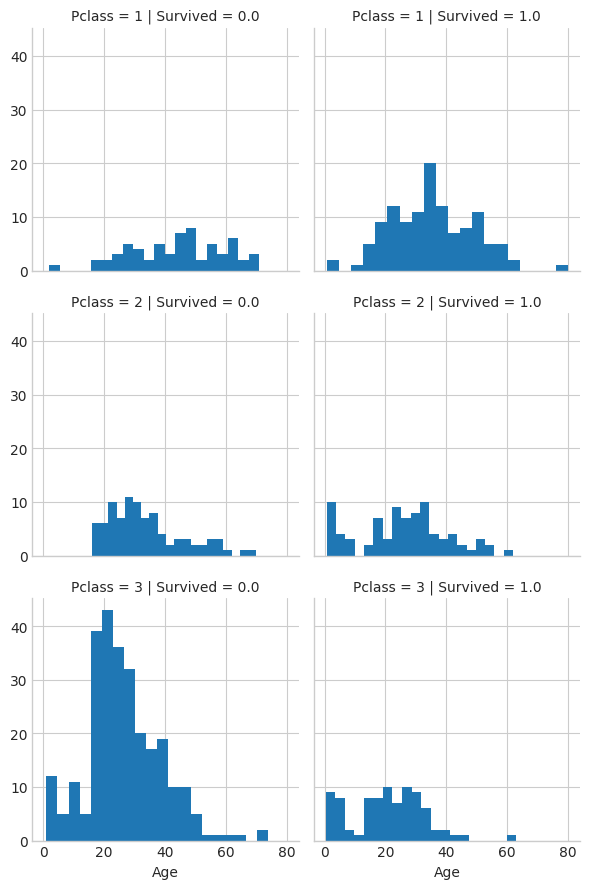

In [130]:
g =sns.FacetGrid(train_df,col="Survived",row="Pclass")
g.map(plt.hist,"Age",bins=20)
plt.show()

* pclass is important feature for model training.

<a  id = "18"></a>
# "Embarked -- Sex -- Pclass -- Survived" Arasındaki Korelasyon

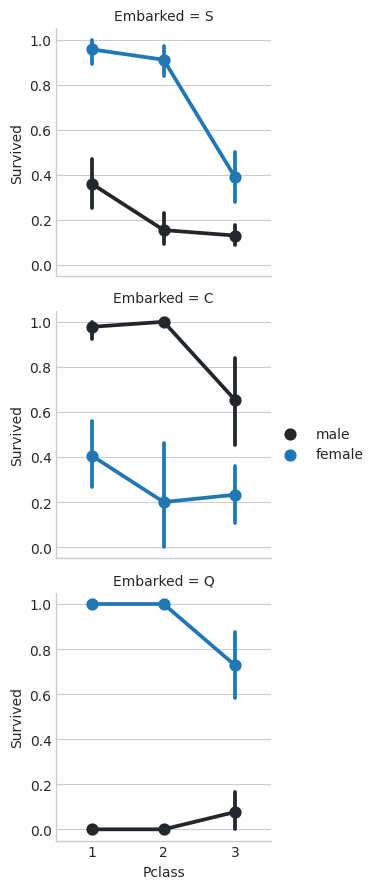

In [131]:
g = sns.FacetGrid(train_df,row="Embarked")
g.map(sns.pointplot, "Pclass","Survived","Sex")
g.add_legend()
plt.show()


* Female passengers have much better survival rate than males.
* males have better survival rate in pclass 3 in C.
* embarked and sex will be used in training.

<a  id = "19"></a>
# "Embarked -- Sex -- Fare -- Survived" Arasındaki Korelasyon

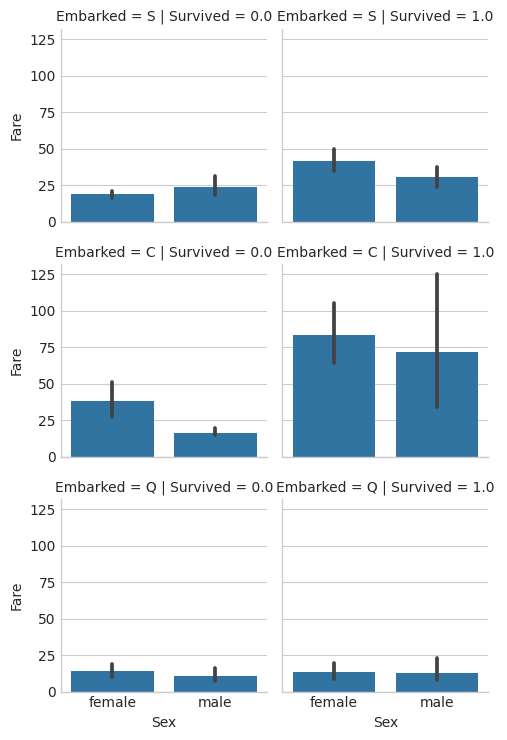

In [132]:
g =sns.FacetGrid(train_df , row="Embarked",col="Survived",height=2.5)
g.map(sns.barplot,"Sex","Fare")
g.add_legend()
plt.show()

* Passsengers who pay higher fare have better survival. Fare can be used as categorical for training.

<a  id = "20"></a>
# Fill Missing Value : **Age Faeture**

In [133]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


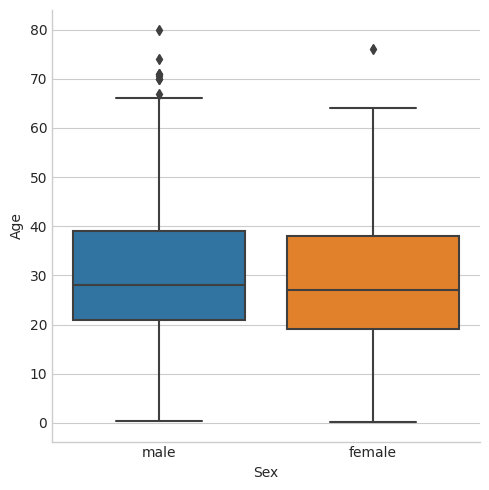

In [134]:
sns.catplot(x="Sex",y="Age",data=train_df,kind="box")
plt.show()

Sex is not information for age prediction. age distribution seems to be same

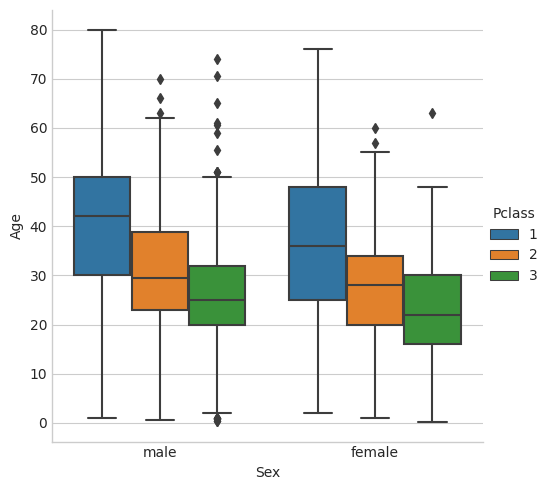

In [135]:
sns.catplot(x="Sex",y="Age",hue="Pclass",data=train_df,kind="box")
plt.show()

1st class passengers are older than 2nd, and 2nd is older than 3rd class.

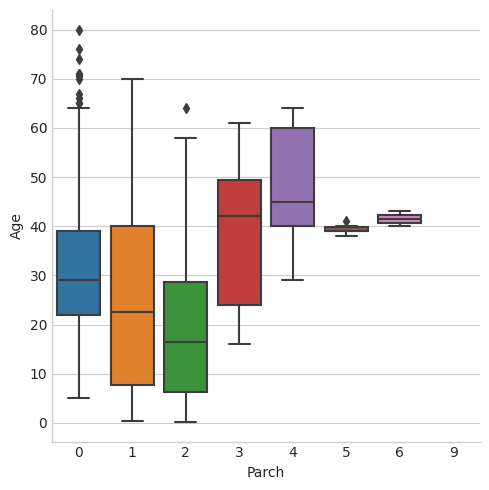

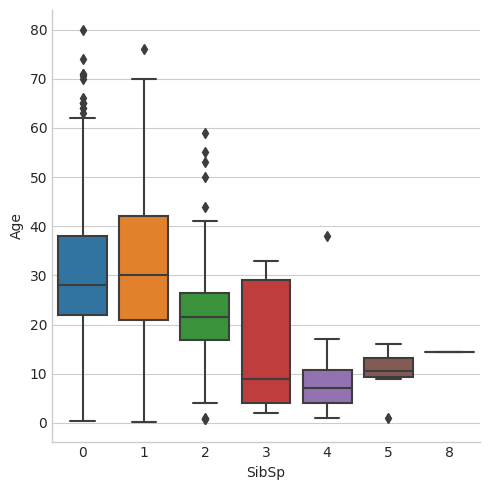

In [136]:
sns.catplot(x="Parch",y="Age",data=train_df,kind="box")
sns.catplot(x="SibSp",y="Age",data=train_df,kind="box")
plt.show()

In [137]:
train_df["Sex"] = [1 if i == "male" else 0 for i in train_df["Sex"]]

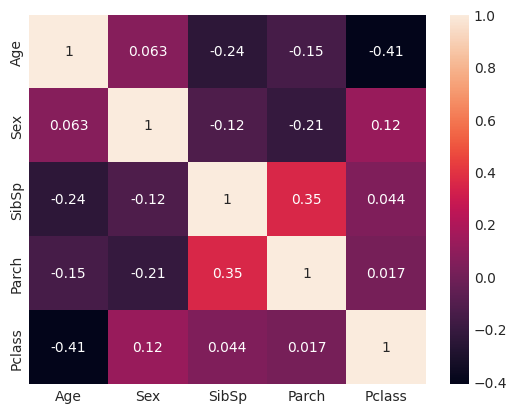

In [138]:
sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot = True)
plt.show()

Age is not correlated with sex but it is correlated with parch, sibsp and pclass.

In [139]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) &(train_df["Parch"] == train_df.iloc[i]["Parch"])& (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

In [140]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a  id = "21"></a>
# Feature Engineering 

<a  id = "22"></a>
***Name -- Title***

In [141]:
train_df["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [142]:
name= train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

In [143]:
train_df["Title"].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

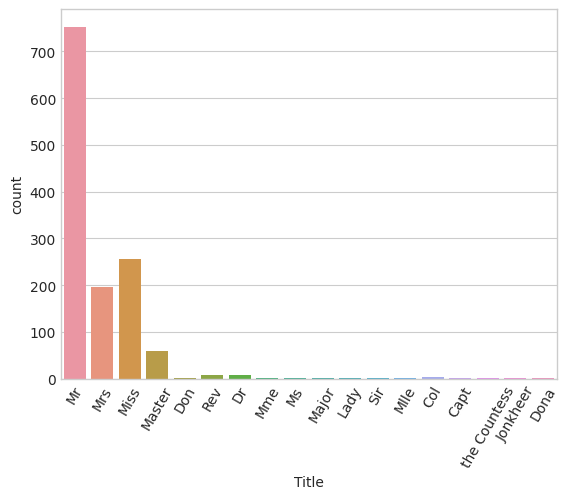

In [144]:
sns.countplot(x="Title",data=train_df)
plt.xticks(rotation=60)
plt.show()

In [145]:
#Convert to categorical
train_df["Title"] = train_df["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
train_df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in train_df["Title"]]
train_df["Title"].head(20)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     0
8     1
9     1
10    1
11    1
12    2
13    2
14    1
15    1
16    0
17    2
18    1
19    1
Name: Title, dtype: int64

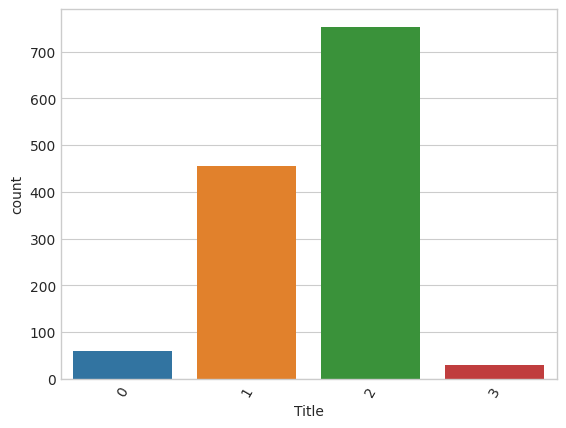

In [146]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

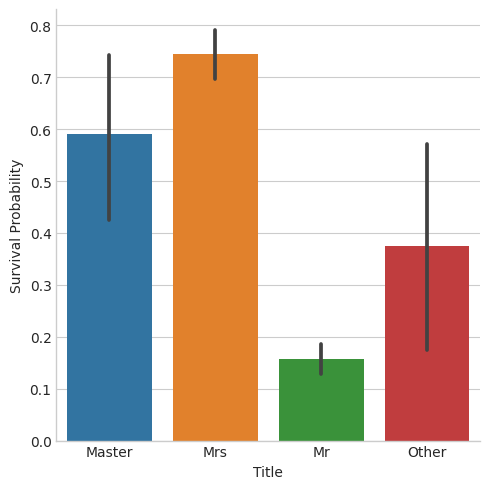

In [147]:
g = sns.catplot(x = "Title", y = "Survived", data = train_df, kind = "bar")
g.set_xticklabels(["Master","Mrs","Mr","Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [148]:
train_df.drop(labels = ["Name"], axis = 1, inplace = True)

In [149]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,2


In [150]:
train_df = pd.get_dummies(train_df,columns=["Title"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,False,True,False,False
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False


<a  id = "23"></a>
# Family Size

In [151]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,False,True,False,False
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False


In [152]:
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1

In [153]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1


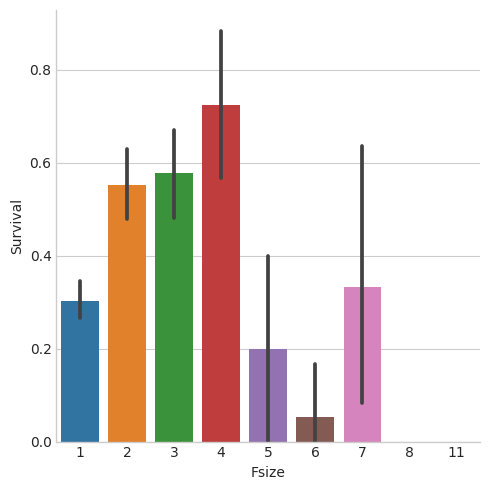

In [154]:
g = sns.catplot(x = "Fsize", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

In [155]:
train_df["family_size"] = [1 if i < 5 else 0 for i in train_df["Fsize"]]

In [156]:
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1,1
5,6,0.0,3,1,25.0,0,0,330877,8.4583,NaN,Q,False,False,True,False,1,1
6,7,0.0,1,1,54.0,0,0,17463,51.8625,E46,S,False,False,True,False,1,1
7,8,0.0,3,1,2.0,3,1,349909,21.0750,NaN,S,True,False,False,False,5,0
8,9,1.0,3,0,27.0,0,2,347742,11.1333,NaN,S,False,True,False,False,3,1
9,10,1.0,2,0,14.0,1,0,237736,30.0708,NaN,C,False,True,False,False,2,1


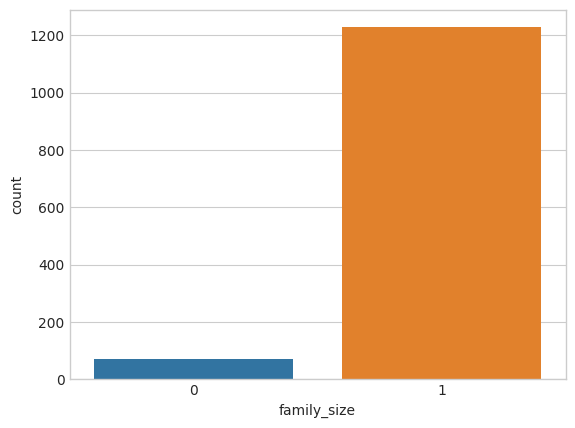

In [157]:
sns.countplot(x = "family_size", data = train_df)
plt.show()

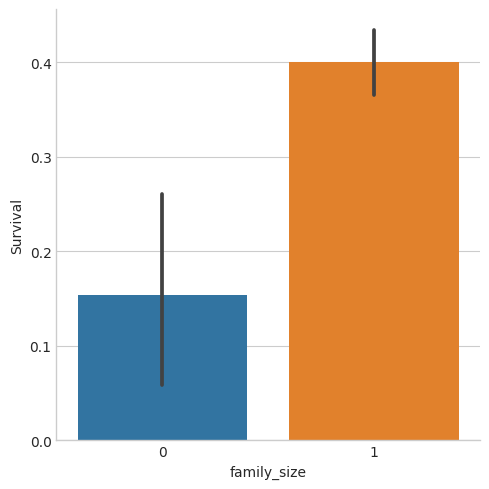

In [158]:
g = sns.catplot(x = "family_size", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

In [159]:
train_df = pd.get_dummies(train_df, columns= ["family_size"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2,False,True
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2,False,True
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1,False,True
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2,False,True
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1,False,True


<a  id = "24"></a>
# Embarked

In [160]:
train_df["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

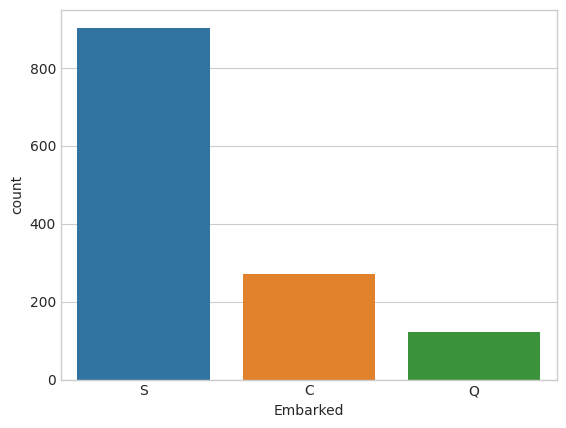

In [161]:
sns.countplot(x = "Embarked", data = train_df)
plt.show()

In [162]:
train_df = pd.get_dummies(train_df, columns=["Embarked"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,False,2,False,True,False,False,True
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,False,True,False,False,2,False,True,True,False,False
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True,False,False,1,False,True,False,False,True
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,False,True,False,False,2,False,True,False,False,True
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,False,False,True,False,1,False,True,False,False,True


<a  id = "25"></a>
# Ticket

In [163]:
train_df["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [164]:
tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"] = tickets

In [165]:
train_df["Ticket"].head(20)

0         A5
1         PC
2     STONO2
3          x
4          x
5          x
6          x
7          x
8          x
9          x
10        PP
11         x
12        A5
13         x
14         x
15         x
16         x
17         x
18         x
19         x
Name: Ticket, dtype: object

In [166]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,1,22.0,1,0,A5,7.2500,NaN,False,False,True,False,2,False,True,False,False,True
1,2,1.0,1,0,38.0,1,0,PC,71.2833,C85,False,True,False,False,2,False,True,True,False,False
2,3,1.0,3,0,26.0,0,0,STONO2,7.9250,NaN,False,True,False,False,1,False,True,False,False,True
3,4,1.0,1,0,35.0,1,0,x,53.1000,C123,False,True,False,False,2,False,True,False,False,True
4,5,0.0,3,1,35.0,0,0,x,8.0500,NaN,False,False,True,False,1,False,True,False,False,True


In [167]:
train_df = pd.get_dummies(train_df, columns= ["Ticket"], prefix = "T")
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x
0,1,0.0,3,1,22.0,1,0,7.2500,NaN,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1.0,1,0,38.0,1,0,71.2833,C85,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1.0,3,0,26.0,0,0,7.9250,NaN,False,...,False,False,False,False,True,False,False,False,False,False
3,4,1.0,1,0,35.0,1,0,53.1000,C123,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0.0,3,1,35.0,0,0,8.0500,NaN,False,...,False,False,False,False,False,False,False,False,False,True
5,6,0.0,3,1,25.0,0,0,8.4583,NaN,False,...,False,False,False,False,False,False,False,False,False,True
6,7,0.0,1,1,54.0,0,0,51.8625,E46,False,...,False,False,False,False,False,False,False,False,False,True
7,8,0.0,3,1,2.0,3,1,21.0750,NaN,True,...,False,False,False,False,False,False,False,False,False,True
8,9,1.0,3,0,27.0,0,2,11.1333,NaN,False,...,False,False,False,False,False,False,False,False,False,True
9,10,1.0,2,0,14.0,1,0,30.0708,NaN,False,...,False,False,False,False,False,False,False,False,False,True


<a  id = "26"></a>
# Pclass 

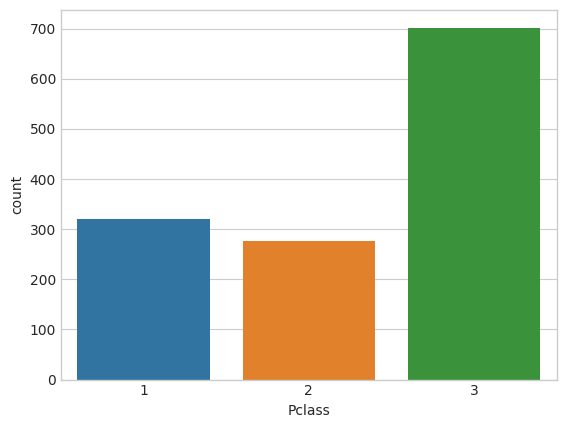

In [168]:
sns.countplot(x = "Pclass", data = train_df)
plt.show()

In [169]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df = pd.get_dummies(train_df, columns= ["Pclass"])
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,1,22.0,1,0,7.2500,NaN,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1.0,0,38.0,1,0,71.2833,C85,False,True,...,False,False,False,False,False,False,False,True,False,False
2,3,1.0,0,26.0,0,0,7.9250,NaN,False,True,...,False,True,False,False,False,False,False,False,False,True
3,4,1.0,0,35.0,1,0,53.1000,C123,False,True,...,False,False,False,False,False,False,True,True,False,False
4,5,0.0,1,35.0,0,0,8.0500,NaN,False,False,...,False,False,False,False,False,False,True,False,False,True


<a  id = "27"></a>
# Sex

In [170]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"])
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,1,0.0,22.0,1,0,7.2500,NaN,False,False,True,...,False,False,False,False,False,False,False,True,False,True
1,2,1.0,38.0,1,0,71.2833,C85,False,True,False,...,False,False,False,False,False,True,False,False,True,False
2,3,1.0,26.0,0,0,7.9250,NaN,False,True,False,...,False,False,False,False,False,False,False,True,True,False
3,4,1.0,35.0,1,0,53.1000,C123,False,True,False,...,False,False,False,False,True,True,False,False,True,False
4,5,0.0,35.0,0,0,8.0500,NaN,False,False,True,...,False,False,False,False,True,False,False,True,False,True


<a  id = "28"></a>
# Drop Passenger ID and Cabin

In [171]:
train_df.drop(labels = ["PassengerId", "Cabin"], axis = 1, inplace = True)

In [172]:
train_df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_0', 'Title_1',
       'Title_2', 'Title_3', 'Fsize', 'family_size_0', 'family_size_1',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'T_A', 'T_A4', 'T_A5',
       'T_AQ3', 'T_AQ4', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC',
       'T_Fa', 'T_LINE', 'T_LP', 'T_PC', 'T_PP', 'T_PPP', 'T_SC', 'T_SCA3',
       'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis', 'T_SOC',
       'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO',
       'T_STONO2', 'T_STONOQ', 'T_SWPP', 'T_WC', 'T_WEP', 'T_x', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1'],
      dtype='object')

<a  id = "29"></a>
# Model Oluşturma

In [173]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

<a  id = "30"></a>
# Train-Test Split

In [174]:
train_df_len

881

In [175]:
test = train_df[train_df_len:]
test.drop(labels = ["Survived"],axis = 1, inplace = True)

In [176]:
test.head()

,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
881,34.5,0,0,7.8292,False,False,True,False,1,False,...,False,False,False,False,True,False,False,True,False,True
882,47.0,1,0,7.0000,False,True,False,False,2,False,...,False,False,False,False,True,False,False,True,True,False
883,62.0,0,0,9.6875,False,False,True,False,1,False,...,False,False,False,False,True,False,True,False,False,True
884,27.0,0,0,8.6625,False,False,True,False,1,False,...,False,False,False,False,True,False,False,True,False,True
885,22.0,1,1,12.2875,False,True,False,False,3,False,...,False,False,False,False,True,False,False,True,True,False


In [177]:
train = train_df[:train_df_len]
X_train = train.drop(labels = "Survived", axis = 1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

X_train 590
X_test 291
y_train 590
y_test 291
test 418


<a  id = "31"></a>
# Simple Logistic Regression

In [178]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2) 
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 82.71
Testing Accuracy: % 81.1


<a  id = "32"></a>
# Hyperparameter Tuning -- Grid Search -- Cross Validation

We will compare 5 ml classifier and evaluate mean accuracy of each of them by stratified cross validation.
* Decision Tree
* SVM
* Random Forest
* KNN
* Logistic Regression

In [184]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [185]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.8355932203389831
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.7983050847457627
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.840677966101695
Fitting 10 folds for each of 14 candidates, totalling 140 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.8186440677966103
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.7813559322033898


Text(0.5, 1.0, 'Cross Validation Scores')

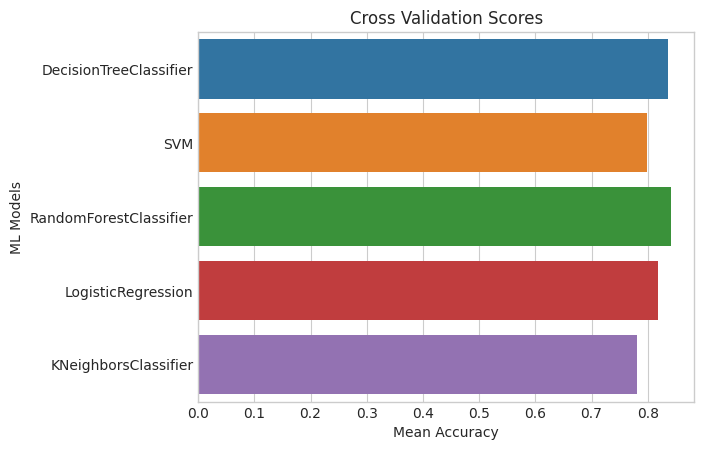

In [188]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot(x="Cross Validation Means", y="ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

<a  id = "33"></a>
# Ensemble Modeling

In [189]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(X_train, y_train)
print(accuracy_score(votingC.predict(X_test),y_test))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8144329896907216


<a  id = "33"></a>
# Prediction and Submission

In [190]:
test_survived = pd.Series(votingC.predict(test), name = "Survived").astype(int)
results = pd.concat([test_PassengerId, test_survived],axis = 1)
results.to_csv("titanic.csv", index = False)